## Introduction to Anamoly Detection

"Anomaly detection, also called outlier detection, is the identification of unexpected events, observations, or items that differ significantly from the norm."  OR

Anomaly detection is any process that finds the outliers of a dataset; those items that don’t belong. These anomalies might point to unusual network traffic, uncover a sensor on the fritz, or simply identify data for cleaning, before analysis.


Let's first create a dummy dataset for ourselves. The dataset will contain just two columns:

* Name of the employees of an organization
* Salaries of those employees (in USD) within a range of 1000 to 2500 (Monthly)

For generating the names (and make them look like the real ones) we will use a Python library called Faker (read the documentation here). For generating salaries, we will use the good old numpy. After generating these, we will merge them in a pandas DataFrame. We are going to generate records for 100 employees. Let's begin.

In [ ]:
!pip install Faker

In [ ]:
# Import the necessary package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from faker import Faker

%matplotlib inline
plt.style.use('ggplot')

faker = Faker()

# to ensure the result are reproducible
Faker.seed(123)

names_list = []

# Generate the name of 100 Employee

for _ in range(100):
    names_list.append(faker.name())
    
salaries = []
# to ensure the result are reproducible
np.random.seed(321)
#Generate the salray of employee between 1000 to 2500 USD

for _ in range(100):
    salary = np.random.randint(1000, 2500)
    salaries.append(salary)

# Create Pandas DataFrame

salary_df = pd.DataFrame({
    'Person': names_list,
    'Salary (in USD)': salaries
})
    
# Print subsection of dataframe (first 10)

salary_df.head(10)
    


,Person,Salary (in USD)
0,Brandon Russell,2012
1,Steven Johnson,1538
2,Evelyn Christian,1124
3,George Cook,1799
4,Aaron Graham,2425
5,Kyle Jones,1168
6,Jerome Whitehead,2434
7,Charles Tyler,1984
8,Thomas Berry,1357
9,Ryan Mack,1328


Let's now manually change the salary entries of two individuals. In reality, this can actually happen for a number of reasons such as the data recording, technical issue, or corrupted files etc.

In [ ]:
salary_df.at[16,'Salary (in USD)'] = 30
salary_df.at[70,'Salary (in USD)'] = 23

# Verify if the salries were changed

print(salary_df.iloc[16])
print(salary_df.iloc[70])

Person             Catherine Wilkins
Salary (in USD)                   30
Name: 16, dtype: object
Person             James Rodriguez
Salary (in USD)                 23
Name: 70, dtype: object


We now have a dataset to proceed with. We will start off our experiments just by looking at the dataset from a visual perspective and see if we can find the anomalies.

## Seeing is believing: Detecting anomalies just by seeing

Hint: Boxplots are great!

Because we can find minimum, maximum, first quartile, 2nd,3rd quartile and median at one place

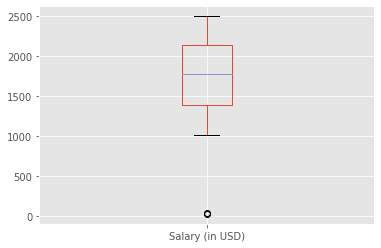

In [ ]:
# Generate a boxplot

salary_df['Salary (in USD)'].plot(kind = 'box')
plt.show()


Notice the tiny circle point in the bottom. You instantly get a feeling of something wrong in there as it deviates hugely from the rest of the data. Now, you decide to look at the data from another visual perspective i.e. in terms of histograms.

How about histograms?

Lets Generate

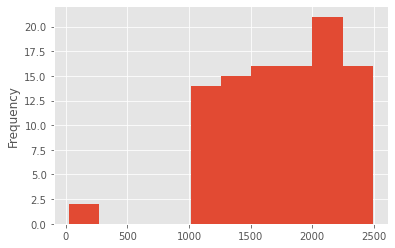

In [ ]:
# Generate Histogram

salary_df['Salary (in USD)'].plot(kind = 'hist')
plt.show()

In the above histogram plot also, we can see there's one particular bin that is just not right as it deviates hugely from the rest of the data 


So what might be an immediate way to confirm that the dataset contains anomalies? Let's take a look at the minimum and maximum values of the column Salary (in USD).

In [ ]:
# Minimum and Maximum salaries 

print('Minimum Salary: ', salary_df['Salary (in USD)'].min())
print('Maximum Salary:', salary_df['Salary (in USD)'].max())

Minimum Salary:  23
Maximum Salary: 2496


Look at the minimum value. From the accounts department of this hypothetical organization, you got to know that the minimum salary of an employee there is $1000. But you found out something different. Hence, its worth enough to conclude that this is indeed an anomaly. Let's now try to look at the data from a different perspective other than just simply plotting it.

Note: Although our dataset contains only one feature (i.e. Salary (in USD)) that contains anomalies in reality, there can be a lot of features which will have anomalies in them. Even there also, these little visualizations will help you a lot.

## Clustering based approach for anomaly detection

We have seen how clustering and anomaly detection are closely related but they serve different purposes. But clustering can be used for anomaly detection. In this approach, we start by grouping the similar kind of objects. Mathematically, this similarity is measured by distance measurement functions like Euclidean distance, Manhattan distance and so on. Euclidean distance is a very popular choice when choosing in between several distance measurement functions. Let's take a look at what Euclidean distance is all about.

An extremely short note on Euclidean distance

If there are n points on a two-dimensional space and their coordinates are denoted by(x_i, y_i), then the Euclidean distance between any two points((x1, y1) and(x2, y2)) on this space is given by:

square root[(x1-x2)^2 + (y1-y2)^2]


## K-Means clustering

We are going to use K-Means clustering which will help us cluster the data points (salary values in our case). The implementation that we are going to be using for KMeans uses Euclidean distance internally. Let's get started.

In [ ]:
# Convert the salary value to a numpy array

salary_raw = salary_df['Salary (in USD)'].values

# For compatibitlity with scipy implementation
salary_raw = salary_raw.reshape(-1, 1)
salary_raw = salary_raw.astype('float64')

# import kmeans from scipy
from scipy.cluster.vq import kmeans

# Specify the data and the number of cluster to kmeans

centroid, avg_distance = kmeans(salary_raw, 4)

In the above chunk of code, we fed the salary data points the kmeans(). We also specified the number of clusters to which we want to group the data points. centroids are the centroids generated by kmeans() and avg_distance is the averaged Euclidean distance between the data points fed and the centroids generated by kmeans().Let's assign the groups of the data points by calling the vq() method. It takes -

* The data points
* The centroid as generated by the clustering algorithm (kmeans() in our case)
It then returns the groups (clusters) of the data points and the distances between the data points and its nearest groups.

In [ ]:
# Get the Group(Cluster) and distance
from scipy import cluster
from scipy.cluster.vq import vq

groups, cdist = cluster.vq.vq(salary_raw, centroid)

Let's now plot the groups we have got.

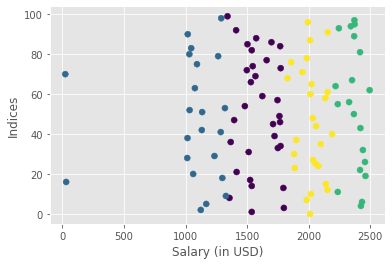

In [ ]:
plt.scatter(salary_raw, np.arange(0,100), c=(groups))
plt.xlabel('Salary (in USD)')
plt.ylabel('Indices')
plt.show()


Can you point to the anomalies? I bet you can! So a few things to consider before you fit the data to a machine learning model:

* Investigate the data thoroughly - take a look at each of the features that the dataset contains and pay close attention to their summary statistics like mean, median.
* Sometimes, it is easy for the eyes to generate a number of useful plots of the different features of the dataset (as shown in the above). Because with the plots in front of you, you instantly get to know about the presence of the weird values which may need further investigation.
* See how the features are correlated to one another. This will in turn help you to select the most significant features from the dataset and to discard the redundant ones. 

The above method for anomaly detection is purely unsupervised in nature. If we had the class-labels of the data points, we could have easily converted this to a supervised learning problem, specifically a classification problem. Shall we extend this? Well, why not?

## Anomaly detection as a classification problem

To be able to treat the task of anomaly detection as a classification task, we need a labeled dataset. Let's give our existing dataset some labels.

We will first assign all the entries to the class of 0 and then we will manually edit the labels for those two anomalies. We will keep these class labels in a column named class. The label for the anomalies will be 1 (and for the normal entries the labels will be 0).

In [ ]:
# First assign all the instance to 0

salary_df['Class'] = 0

# Now manually changed the class label for anamoly to 1
salary_df.at[16, 'Class'] = 1
salary_df.at[70, 'Class'] = 1

# Lets verify
print(salary_df.iloc[16]['Class'])
print(salary_df.iloc[70]['Class'])

# Lets see last 10 observation / row

salary_df.tail(10)

1
1


,Person,Salary (in USD),Class
90,Andrea Ayers,1018,0
91,Rick Rodriguez,2155,0
92,Pamela Graham,1411,0
93,Johnny Lee,2246,0
94,David Johnson,2343,0
95,Angel Ho,2374,0
96,Matthew Payne,1994,0
97,Todd Cross,2372,0
98,Jessica Carter,1290,0
99,Brian Lambert,1341,0


We now have a Binary Classification Task.
We are going to use KNN-Classification method for this class
Also, we are going to use a Python library called PyOD which is specifically developed for anomaly detection purposes.

"PyOD is a comprehensive and scalable Python toolkit for detecting outlying objects in multivariate data. This exciting yet challenging field is commonly referred as Outlier Detection or Anomaly Detection."

The column Person is not at all useful for the model as it is nothing but a kind of identifier. Let's prepare the training data accordingly.

In [ ]:
!pip install pyod

In [ ]:
# Import the knn from pyod model

from pyod.models.knn import KNN

# Segregate / seperate the salary and class values

X = salary_df['Salary (in USD)'].values.reshape(-1,1)
y = salary_df['Class'].values

# Train KNN classifier

clf = KNN(contamination = 0.02, n_neighbors = 5)
clf.fit(X)


KNN(algorithm='auto', contamination=0.02, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

Let's discuss the two parameters we passed into KNN() -

* contamination - the amount of anomalies in the data (in percentage) which for our case is 2/100 = 0.02
* n_neighbors - number of neighbors to consider for measuring the proximity

Let's now get the prediction labels on the training data and then get the outlier scores of the training data. The outlier scores of the training data. The higher the scores are, the more abnormal. This indicates the overall abnormality in the data. These handy features make PyOD a great utility for anomaly detection related tasks.

 Try to evaluate KNN() with respect to the training data. PyOD provides a handy function for this - evaluate_print().

In [ ]:
# Get the prediction label of training data

y_train_pred = clf.labels_

# Outlier Score
y_train_score = clf.decision_scores_

# Now Model Evaluation

# for model evaluation we will import the utility function
from pyod.utils import evaluate_print

# Evaluate on the training data
evaluate_print(KNN, y, y_train_score)

<class 'pyod.models.knn.KNN'> ROC:1.0, precision @ rank n:1.0


We see that the KNN() model was able to perform exceptionally good on the training data. It provides three metrics and their scores -

* ROC
* Precision along with a confidence rank


Note: While detecting anomalies, we almost always consider ROC and Precision as it gives a much better idea about the model's performance. We have also seen its significance in the earlier sections.

We don't have any test data. But we can generate a sample salary value, right?

In [ ]:
# Lets check a salay of $37 and $1589

x_test = np.array([[37.]])

print('Class for $37: ',clf.predict(x_test))

x_test = np.array([[1589.]])

print('Class for $1589: ',clf.predict(x_test))


Class for $37:  [1]
Class for $1589:  [0]


As the above result show correct prediction for unseen value.

This was short introduction about Anomaly detection with a simple example. Hope this will help in complex problem.